# Clustering of Neighborhoods in Toronto, Canada Based on Nearby Venue Categories

To start the project, all necessary libraries were imported.

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import requests
from bs4 import BeautifulSoup
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#!conda install folium -c conda-forge
import folium # map rendering library
#!conda install -c conda-forge geopy 
from geopy.geocoders import Nominatim

print('Libraries imported.')

Libraries imported.


### I. Web Scraping and Data Wrangling
For the data collection, details about the boroughs and neighborhoods in Canada was extracted from a wikipedia page through the use of BeautifulSoup. After data cleaning, a Pandas dataframe containing all data was created. To visualize the generated neighborhood in Toronto, the Folium library was used.

In [223]:
website_url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text

soup = BeautifulSoup(website_url,"lxml")
print(soup.prettify()) 

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"652df336-7a6c-4f10-8854-52123f8436fb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":960187814,"wgRevisionId":960187814,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toron

In [224]:
My_table = soup.find("table",{"class":"wikitable sortable"})
print(My_table.get_text())



Postal Code

Borough

Neighborhood


M1A

Not assigned

Not assigned


M2A

Not assigned

Not assigned


M3A

North York

Parkwoods


M4A

North York

Victoria Village


M5A

Downtown Toronto

Regent Park, Harbourfront


M6A

North York

Lawrence Manor, Lawrence Heights


M7A

Downtown Toronto

Queen's Park, Ontario Provincial Government


M8A

Not assigned

Not assigned


M9A

Etobicoke

Islington Avenue, Humber Valley Village


M1B

Scarborough

Malvern, Rouge


M2B

Not assigned

Not assigned


M3B

North York

Don Mills


M4B

East York

Parkview Hill, Woodbine Gardens


M5B

Downtown Toronto

Garden District, Ryerson


M6B

North York

Glencairn


M7B

Not assigned

Not assigned


M8B

Not assigned

Not assigned


M9B

Etobicoke

West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale


M1C

Scarborough

Rouge Hill, Port Union, Highland Creek


M2C

Not assigned

Not assigned


M3C

North York

Don Mills


M4C

East York

Woodbine Heights


M5C

Downtown Toronto



In [225]:
#Extracting all elements in the table
extract=[]
for string in My_table.stripped_strings:
    extract.append(repr(string))
extract

["'Postal Code'",
 "'Borough'",
 "'Neighborhood'",
 "'M1A'",
 "'Not assigned'",
 "'Not assigned'",
 "'M2A'",
 "'Not assigned'",
 "'Not assigned'",
 "'M3A'",
 "'North York'",
 "'Parkwoods'",
 "'M4A'",
 "'North York'",
 "'Victoria Village'",
 "'M5A'",
 "'Downtown Toronto'",
 "'Regent Park, Harbourfront'",
 "'M6A'",
 "'North York'",
 "'Lawrence Manor, Lawrence Heights'",
 "'M7A'",
 "'Downtown Toronto'",
 '"Queen\'s Park, Ontario Provincial Government"',
 "'M8A'",
 "'Not assigned'",
 "'Not assigned'",
 "'M9A'",
 "'Etobicoke'",
 "'Islington Avenue, Humber Valley Village'",
 "'M1B'",
 "'Scarborough'",
 "'Malvern, Rouge'",
 "'M2B'",
 "'Not assigned'",
 "'Not assigned'",
 "'M3B'",
 "'North York'",
 "'Don Mills'",
 "'M4B'",
 "'East York'",
 "'Parkview Hill, Woodbine Gardens'",
 "'M5B'",
 "'Downtown Toronto'",
 "'Garden District, Ryerson'",
 "'M6B'",
 "'North York'",
 "'Glencairn'",
 "'M7B'",
 "'Not assigned'",
 "'Not assigned'",
 "'M8B'",
 "'Not assigned'",
 "'Not assigned'",
 "'M9B'",
 "'Etobi

In [226]:
#Reshaping the list
import numpy as np
extractreshape=np.asarray(extract)
extractreshape.reshape(-1,3)

array([["'Postal Code'", "'Borough'", "'Neighborhood'"],
       ["'M1A'", "'Not assigned'", "'Not assigned'"],
       ["'M2A'", "'Not assigned'", "'Not assigned'"],
       ["'M3A'", "'North York'", "'Parkwoods'"],
       ["'M4A'", "'North York'", "'Victoria Village'"],
       ["'M5A'", "'Downtown Toronto'", "'Regent Park, Harbourfront'"],
       ["'M6A'", "'North York'", "'Lawrence Manor, Lawrence Heights'"],
       ["'M7A'", "'Downtown Toronto'",
        '"Queen\'s Park, Ontario Provincial Government"'],
       ["'M8A'", "'Not assigned'", "'Not assigned'"],
       ["'M9A'", "'Etobicoke'",
        "'Islington Avenue, Humber Valley Village'"],
       ["'M1B'", "'Scarborough'", "'Malvern, Rouge'"],
       ["'M2B'", "'Not assigned'", "'Not assigned'"],
       ["'M3B'", "'North York'", "'Don Mills'"],
       ["'M4B'", "'East York'", "'Parkview Hill, Woodbine Gardens'"],
       ["'M5B'", "'Downtown Toronto'", "'Garden District, Ryerson'"],
       ["'M6B'", "'North York'", "'Glencairn'"],
  

In [227]:
df = pd.DataFrame(extractreshape.reshape(-1,3))
df.head()

,0,1,2
0,'Postal Code','Borough','Neighborhood'
1,'M1A','Not assigned','Not assigned'
2,'M2A','Not assigned','Not assigned'
3,'M3A','North York','Parkwoods'
4,'M4A','North York','Victoria Village'


In [228]:
#removing the quotation marks in all elements

df[0] = df[0].map(lambda x: str(x)[1:]).map(lambda x: str(x)[:-1])
df[1] = df[1].map(lambda x: str(x)[1:]).map(lambda x: str(x)[:-1])
df[2] = df[2].map(lambda x: str(x)[1:]).map(lambda x: str(x)[:-1])
df.head()

,0,1,2
0,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


In [229]:
#setting the first row as the dataframe header

new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header
df.head()

,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [230]:
#removing all entries without unassigend borough and neighborhood

torontodf=df[~df.Borough.str.contains("Not assigned")]
torontodf.head()

,Postal Code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


The analysis focuses on Toronto-based boroughs. Other boroughs were removed from the dataframe.

In [231]:
torontodf['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

In [232]:
toronto=['Downtown Toronto', 'East Toronto', 'West Toronto', 'Central Toronto']
torontodf=torontodf.loc[torontodf['Borough'].isin(toronto)]
torontodf.head()

,Postal Code,Borough,Neighborhood
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
14,M5B,Downtown Toronto,"Garden District, Ryerson"
23,M5C,Downtown Toronto,St. James Town
31,M4E,East Toronto,The Beaches


In [233]:
#resetting indices of dataframe
torontodf = torontodf.reset_index(drop=True)
torontodf.head()

,Postal Code,Borough,Neighborhood
0,M5A,Downtown Toronto,"Regent Park, Harbourfront"
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
2,M5B,Downtown Toronto,"Garden District, Ryerson"
3,M5C,Downtown Toronto,St. James Town
4,M4E,East Toronto,The Beaches


In [234]:
torontodf.shape

(39, 3)

To insert the latitude and longitude values of each neighborhood, a csv file containing the data was imported. In the following cell, the code performed an action equivalent to vlookup of excel wherein the postal code is used to match the latitude and longitude information.

In [235]:
#previewing the csv reference file for latitude and longitude
geodata = pd.read_csv("https://cocl.us/Geospatial_data") 
geodata.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [236]:
#inserting latitude and longitude into the dataframe
torontodf.insert(3, 'Latitude', torontodf['Postal Code'].map(geodata.set_index('Postal Code')['Latitude']))
torontodf.insert(3, 'Longitude', torontodf['Postal Code'].map(geodata.set_index('Postal Code')['Longitude']))
torontodf.head()

,Postal Code,Borough,Neighborhood,Longitude,Latitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",-79.360636,43.654260
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",-79.389494,43.662301
2,M5B,Downtown Toronto,"Garden District, Ryerson",-79.378937,43.657162
3,M5C,Downtown Toronto,St. James Town,-79.375418,43.651494
4,M4E,East Toronto,The Beaches,-79.293031,43.676357


In this part, the geographical location of Toronto was identified . A map of the selected Toronto boroughs were illustrated in the map.

In [237]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [238]:
# create map of toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(torontodf['Latitude'], torontodf['Longitude'], torontodf['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### II. Defining Foursquare Credentials and Functions
In this part, the credentials of the developer account of Foursquare were set up. In addition, functions to be used in the latter part were defined.

In [239]:
# Inputting the Foursquare ID credentials from developer account
CLIENT_ID = 'ZQZAQSNWC1YQMNIBGT4XS40IGAUXEUMVYC0QBYOWH54ISJXV'
CLIENT_SECRET = 'IWNWIMP3PZHG2NNNHB254KRC1S4FU5IQO5T03RSJVLKFKQA1'
VERSION = '20200602'

In [240]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [241]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

In [242]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### III. Data Exploration

In this part, a new dataframe that contains information regarding nearby venues for each neighborhood in the four boroughts was created.

In [243]:
toronto_venues = getNearbyVenues(names=torontodf['Neighborhood'],
                                   latitudes=torontodf['Latitude'],
                                   longitudes=torontodf['Longitude']
                                  )


Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


"""Let's check the size of the resulting dataframe"""

In [244]:
print(toronto_venues.shape)
toronto_venues.head()

(1618, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [245]:
#Checking the number of venues generated for each neighborhood
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",18,18,18,18,18,18
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,31,31,31,31,31,31


In [246]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 237 uniques categories.


### IV. Data Analysis

Before applying the machine learning algorithm, the one hot encoding process was first applied to the generated data.

In [247]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

Below list all venue subcategory present for each neighborhood wherein 0 means absence and 1 indicates presence.

In [248]:
toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
toronto_onehot.shape

(1618, 237)

In the new dataframe, each rows were grouped according to the neighborhood. In addition, the mean of occurence frequency of each category was presented. 
This dataframe will be used for the K-means clustering.

In [250]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.015385,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.025641,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.012821,0.012821,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.032258,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [251]:
toronto_grouped.shape

(39, 237)

In this part, the neighborhood along with the top 5 most common venues can be viewed.

In [252]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2          Restaurant  0.04
3  Seafood Restaurant  0.04
4         Cheese Shop  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1     Coffee Shop  0.09
2  Breakfast Spot  0.09
3          Bakery  0.09
4             Gym  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0           Yoga Studio  0.06
1         Auto Workshop  0.06
2  Gym / Fitness Center  0.06
3         Garden Center  0.06
4                Garden  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3             Plane  0.06
4          Boutique  0.06


----Central Bay Street----
                 venue  freq
0      

To preview, a function that sorts venues in descending order was defined. A new dataframe was created to present top 10 venues for each neighborhood.

In [253]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [254]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Café,Cheese Shop,Beer Bar,Restaurant,Seafood Restaurant,Pub,Creperie
1,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Coffee Shop,Breakfast Spot,Grocery Store,Convenience Store,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Park,Pizza Place,Restaurant,Butcher,Burrito Place,Brewery,Skate Park,Light Rail Station
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Airport Lounge,Boutique,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Harbor / Marina,Airport Gate
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Japanese Restaurant,Sandwich Place,Burger Joint,Department Store,Salad Place,Bubble Tea Shop,Yoga Studio
5,Christie,Grocery Store,Café,Park,Candy Store,Italian Restaurant,Diner,Baby Store,Restaurant,Coffee Shop,Nightclub
6,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Café,Pub,Men's Store,Mediterranean Restaurant,Hotel
7,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Restaurant,Hotel,American Restaurant,Gym,Seafood Restaurant,Deli / Bodega,Italian Restaurant,Japanese Restaurant
8,Davisville,Dessert Shop,Sandwich Place,Sushi Restaurant,Coffee Shop,Gym,Italian Restaurant,Pizza Place,Café,Diner,Indian Restaurant
9,Davisville North,Park,Pizza Place,Breakfast Spot,Sandwich Place,Food & Drink Shop,Department Store,Hotel,Gym / Fitness Center,Gym,Concert Hall


### V. Application of Clustering Algorithm
The K-Means clustering algorithm was used. The number of clusters was set to 2. This choice will be explained in application the elbow method in the latter part.

In [255]:
# set number of clusters
kclusters = 2

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

"""""Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [256]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = torontodf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged

,Postal Code,Borough,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",-79.360636,43.654260,1,Coffee Shop,Bakery,Park,Pub,Restaurant,Breakfast Spot,Café,Theater,Hotel,Dessert Shop
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",-79.389494,43.662301,1,Coffee Shop,Sushi Restaurant,Yoga Studio,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,College Auditorium
2,M5B,Downtown Toronto,"Garden District, Ryerson",-79.378937,43.657162,1,Clothing Store,Coffee Shop,Bubble Tea Shop,Café,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Middle Eastern Restaurant,Diner,Bakery
3,M5C,Downtown Toronto,St. James Town,-79.375418,43.651494,1,Café,Coffee Shop,Cocktail Bar,American Restaurant,Gastropub,Restaurant,Clothing Store,Moroccan Restaurant,Cosmetics Shop,Creperie
4,M4E,East Toronto,The Beaches,-79.293031,43.676357,1,Trail,Health Food Store,Pub,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store
5,M5E,Downtown Toronto,Berczy Park,-79.373306,43.644771,1,Coffee Shop,Cocktail Bar,Bakery,Café,Cheese Shop,Beer Bar,Restaurant,Seafood Restaurant,Pub,Creperie
6,M5G,Downtown Toronto,Central Bay Street,-79.387383,43.657952,1,Coffee Shop,Café,Italian Restaurant,Japanese Restaurant,Sandwich Place,Burger Joint,Department Store,Salad Place,Bubble Tea Shop,Yoga Studio
7,M6G,Downtown Toronto,Christie,-79.422564,43.669542,1,Grocery Store,Café,Park,Candy Store,Italian Restaurant,Diner,Baby Store,Restaurant,Coffee Shop,Nightclub
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",-79.384568,43.650571,1,Coffee Shop,Café,Restaurant,Hotel,Deli / Bodega,Gym,Clothing Store,Thai Restaurant,Salad Place,Concert Hall
9,M6H,West Toronto,"Dufferin, Dovercourt Village",-79.442259,43.669005,1,Bakery,Pharmacy,Bank,Bar,Middle Eastern Restaurant,Café,Supermarket,Grocery Store,Pet Store,Music Venue


To determine the most appropriate number of clusters for the data, the Elbow Method was utilized.

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


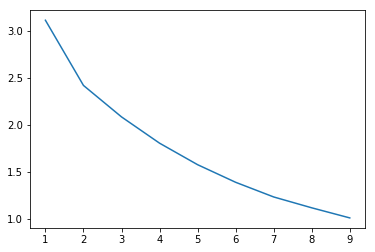

In [257]:
# Elbow criterion
def elbow_plot(data=toronto_grouped_clustering, maxK=10, seed_centroids=None):
    
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(toronto_grouped_clustering, maxK=10)

As can be seen with the graph above, using the elbow method is not that effective in determining the appropriate number of cluster for the data. The data author resorted to use 2 as the line after 2 has almost similar slope.

In this instance, it is recomendded to try other validation technique or use more effecient clustering algorithm.

### VI. Results

The map below shows the result of the clustering.

In [258]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The following shows the each the most common venue for the neighborhoods in each cluster

In [259]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,0,Park,Swim School,Bus Line,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
29,Central Toronto,0,Park,Gym,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
33,Downtown Toronto,0,Park,Playground,Trail,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [260]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,1,Coffee Shop,Bakery,Park,Pub,Restaurant,Breakfast Spot,Café,Theater,Hotel,Dessert Shop
1,Downtown Toronto,1,Coffee Shop,Sushi Restaurant,Yoga Studio,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,College Auditorium
2,Downtown Toronto,1,Clothing Store,Coffee Shop,Bubble Tea Shop,Café,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Middle Eastern Restaurant,Diner,Bakery
3,Downtown Toronto,1,Café,Coffee Shop,Cocktail Bar,American Restaurant,Gastropub,Restaurant,Clothing Store,Moroccan Restaurant,Cosmetics Shop,Creperie
4,East Toronto,1,Trail,Health Food Store,Pub,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store
5,Downtown Toronto,1,Coffee Shop,Cocktail Bar,Bakery,Café,Cheese Shop,Beer Bar,Restaurant,Seafood Restaurant,Pub,Creperie
6,Downtown Toronto,1,Coffee Shop,Café,Italian Restaurant,Japanese Restaurant,Sandwich Place,Burger Joint,Department Store,Salad Place,Bubble Tea Shop,Yoga Studio
7,Downtown Toronto,1,Grocery Store,Café,Park,Candy Store,Italian Restaurant,Diner,Baby Store,Restaurant,Coffee Shop,Nightclub
8,Downtown Toronto,1,Coffee Shop,Café,Restaurant,Hotel,Deli / Bodega,Gym,Clothing Store,Thai Restaurant,Salad Place,Concert Hall
9,West Toronto,1,Bakery,Pharmacy,Bank,Bar,Middle Eastern Restaurant,Café,Supermarket,Grocery Store,Pet Store,Music Venue


### VII. Remarks

Based on the two previous dataframes, the cluster with label 1 mostly contains food-related venues such as coffee shops, cafe, and restaurants. On the other hand, the other cluster contains amenity services such as parks, gym, playground, and event space.